In [ ]:
!cp -r /content/drive/MyDrive/Lenguaje/Proyecto/Modules Modules
!pip install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
!pip install top2vec

     |████████████████████████████████| 18.2 MB 516 kB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
     |████████████████████████████████| 837 kB 52.8 MB/s 
     |████████████████████████████████| 136 kB 55.6 MB/s 
     |████████████████████████████████| 830 kB 57.9 MB/s 
     |████████████████████████████████| 822 kB 54.4 MB/s 
     |████████████████████████████████| 802 kB 56.8 MB/s 
     |████████████████████████████████| 802 kB 38.9 MB/s 
     |████████████████████████████████| 793 kB 55.7 MB/s 
     |████████████████████████████████| 793 kB 47.2 MB/s 
     |████████████████████████████████| 791 kB 57.5 MB/s 
     |████████████████████████████████| 786 kB 28.7 MB/s 
     |████████████████████████████████| 779 kB 35.3 MB/s 
     |████████████████████████████████| 778 kB 53.7 MB/s 
     |████████████████████████████████| 776 kB 55.1 MB/s 
     |████████████████████████████████| 769 kB 56.9 MB/s 
     |████████████████████████████████| 766 kB 48.4 MB/s 
     |██████████

In [ ]:
from Modules.functions import get_centroid_topics
from Modules.params import get_params
import matplotlib.pyplot as plt
from pandas import read_csv
from top2vec import Top2Vec
import matplotlib as mpl
from os.path import join

In [ ]:
params=get_params()
filename=join(params["path models"],
              params["yahoo model"])
model = Top2Vec.load(filename)

In [ ]:
filename = join(params["path results"],
                "yahoo_clustered.csv")
clustered = read_csv(filename)
centroids = get_centroid_topics(clustered,
                                model)

(-2.8440492500000003, 6.741818250000001, 2.4407268, 14.1242052)

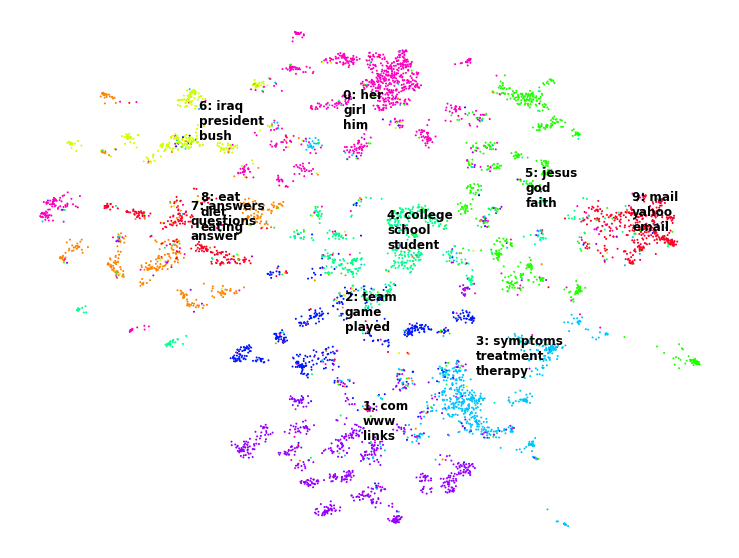

In [ ]:
bounds = list(range(0, 10))
cmap = mpl.cm.gist_rainbow_r
norm = mpl.colors.BoundaryNorm(bounds,
                               cmap.N)
plt.subplots(figsize=(13, 10))
plt.scatter(clustered.x,
            clustered.y,
            c=clustered["topic"],
            cmap=cmap,
            norm=norm,
            s=1)
for index, data in centroids.items():
    topic_name = data["topic name"]
    centroid = data["centroid"]
    plt.text(centroid[0],
             centroid[1],
             topic_name,
             fontsize=12,
             weight='bold')
plt.axis("off")